In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from labellines import labelLine, labelLines


In [4]:
def cost(flops, iops):
        return flops +  0.2*iops



In [7]:

def get_data(ds, bc, datafile):
    # csv_file_path = "TimingData_roofline.csv"
    csv_file_path = datafile
    df = pd.read_csv(csv_file_path)
    df = df.loc[(df["function"]==bc)]
    df = df.loc[(df['DIRECTION_SIZE'] == ds)]
    nx = df["NX"].values
    iops = df["iops"].values
    flops = df["flops"].values
    ts = df["TIMESTEPS"].values
    cycles = df["cycles"].values

    bread = df["bytes_read"].values
    bwrite = df["bytes_write"].values
    
    bytes = bread + bwrite
    fOI = flops/bytes
    iOI = iops/bytes 
    fOIr = flops/bread
    iOIr = iops/bread
    fOIw = flops/bwrite
    iOIw = iops/bwrite 
    fP = ts*flops/cycles
    iP = ts*iops/cycles


    return fOI,iOI,fOIr,iOIr,fOIw,iOIw,fP,iP,nx

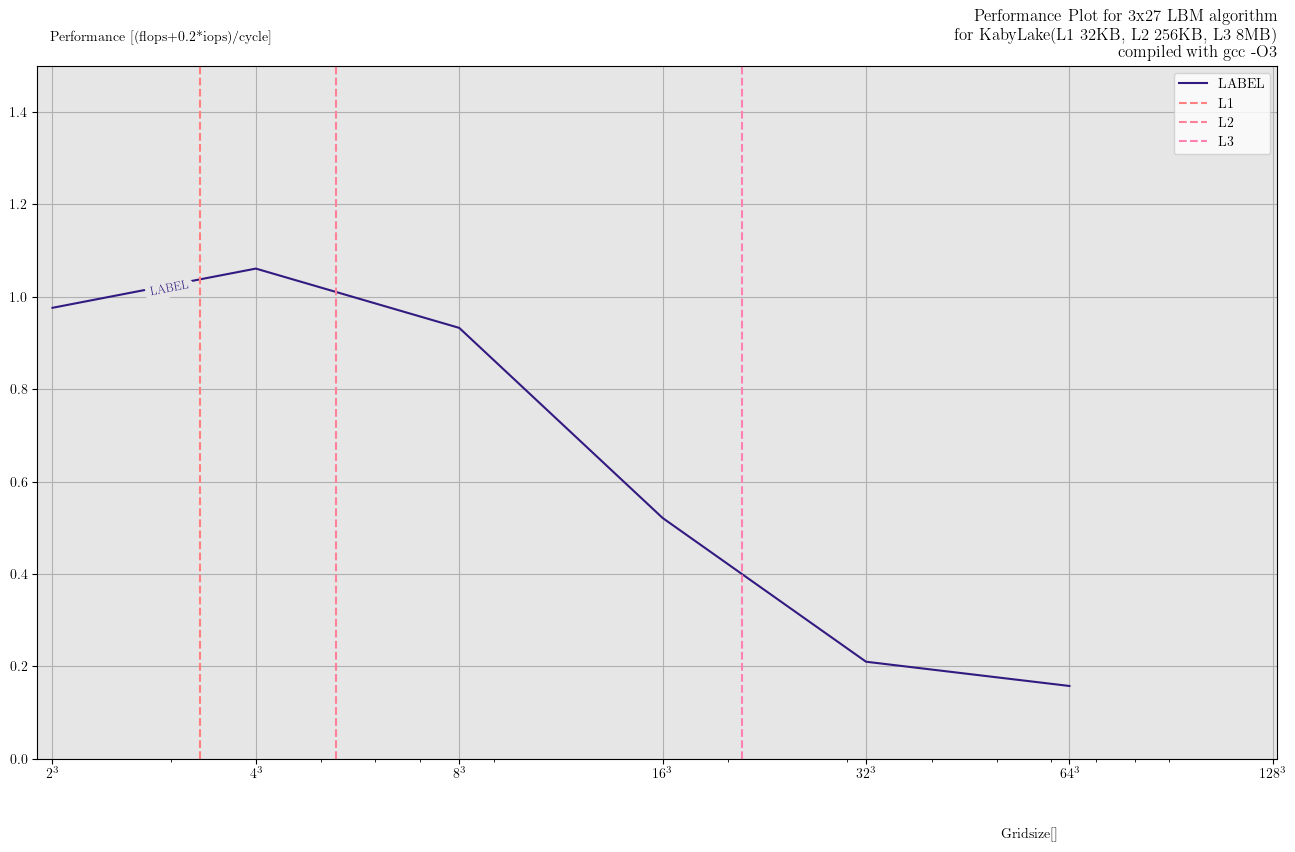

In [18]:

from matplotlib import rc





rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Helvetica']

def plotTime(fname, title, ds, datafile): 

    fOI,iOI,fOIr,iOIr,fOIw,iOIw,fP,iP,nx = get_data(ds, fname, datafile)

    plt.figure()   
    ax = plt.gca()

    # df1 = df.loc[(df["BOUNDARY_CONDITION"]==1)]
    # df2 = df.loc[(df["BOUNDARY_CONDITION"]==2)]
    # df3 = df.loc[(df["BOUNDARY_CONDITION"]==3)]
    # xaxis = df1["NX"].values
    
    plt.semilogx()

    plt.plot(nx, cost(fP, iP), color=(0.2,0.1,0.5,1),label="LABEL")
    # plt.plot(xaxis, cost(df1["flops"], df1["iops"])/df1["cyclesStruct"], color=(0.2,0.1,0.5,1),label="Periodic BC")
    # plt.plot(xaxis, cost(df2["flops"], df2["iops"])/df2["cyclesStruct"], color=(0.2,0.2,0.6,1),label="Couette BC")
    # plt.plot(xaxis, cost(df3["flops"], df3["iops"])/df3["cyclesStruct"], color=(0.2,0.3,0.7,1),label="Lees-Ewards BC")

    if(ds==9):
        # (2^(15) /((2*9+2)*16))   ^(1/3)
        ax.axvline(x=4.6, color=(1,0.5,0.5), linestyle='--', label='L1')  
        # (2^(18) /((2*9+2)*16))   ^(1/3)
        ax.axvline(x=9.3, color=(1,0.5,0.6), linestyle='--', label='L2')
        # (2^(23) /((2*9+2)*16))   ^(1/3)
        ax.axvline(x=29.7, color=(1,0.5,0.7), linestyle='--', label='L3')
    if(ds==15):
        # (2^(15) /((2*15+2)*16))   ^(1/3)
        ax.axvline(x=4, color=(1,0.5,0.5), linestyle='--', label='L1')  
        # (2^(17) /((2*15+2)*16))   ^(1/3)   
        ax.axvline(x=6.3, color=(1,0.5,0.6), linestyle='--', label='L2')
        # (2^(18) /((2*15+2)*16))   ^(1/3)
        ax.axvline(x=25.4, color=(1,0.5,0.7), linestyle='--', label='L3')
    if(ds==27):
        # (2^(15) /((2*27+2)*16))   ^(1/3)   
        ax.axvline(x=3.31, color=(1,0.5,0.5), linestyle='--', label='L1')  
        # (2^(17) /((2*27+2)*16))   ^(1/3)    
        ax.axvline(x=5.26, color=(1,0.5,0.6), linestyle='--', label='L2')
        #(2^(23) /((2*27+2)*16))   ^(1/3)
        ax.axvline(x=21, color=(1,0.5,0.7), linestyle='--', label='L3')


    plt.xlabel('Gridsize[]')
    plt.ylabel('Performance [(flops+0.2*iops)/cycle]', rotation=0)

    ax.yaxis.set_label_coords(0.1, 1.03)
    ax.xaxis.set_label_coords(0.8, -0.1)

    x_ticks =  [2,4,8,16,32,64,128]
    x_ticksL = ["$2^3$","$4^3$","$8^3$","$16^3$","$32^3$", "$64^3$", "$128^3$"]
    # y_ticks = []

    xmin = 1.9
    xmax = 130
    ymin=0
    ymax=1.5
    plt.axis([xmin,xmax,ymin,ymax])

    ax.set_facecolor((0.9,0.9,0.9))


    lines = ax.get_lines()
    labelLine(lines[0], 3,   align=True,  fontsize=9, yoffset=0) 
    # labelLine(lines[1], 3,   align=True,  fontsize=9, yoffset=0) 
    # labelLine(lines[2], 12,  align=False,  fontsize=9, yoffset=-0.08) 

    plt.xticks(x_ticks, x_ticksL)
    plt.legend()
    plt.title(title, loc="right") #, x=0.85, y=0.9)
    plt.grid(True)
    plt.show



title27 = "Performance Plot for 3x27 LBM algorithm \n for KabyLake(L1 32KB, L2 256KB, L3 8MB) \n compiled with gcc -O3"

title15 = "Performance Plot for 3x15 LBM algorithm \n for KabyLake(L1 32KB, L2 256KB, L3 8MB) \n compiled with gcc -O3"

title9 = "Performance Plot for 2x9 LBM algorithm \n for KabyLake(L1 32KB, L2 256KB, L3 8MB) \n compiled with gcc -O3"


datafile = "TimingData_roofline.csv"

fname = "LBM Baseline"

plotTime(fname, title27, 27, datafile)
# plotTime(df, title15, 15)
# plotTime(df, title9, 9)

CPUID code	0806e9h, 0806eah, 0906e9h
Product code	80677
Performance
Max. CPU clock rate	1.00 GHz to 4.5 GHz
Cache
L1 cache	64 KB[a] per core (32 KB instructions + 32 KB data)
L2 cache	256 KB per core
L3 cache	Up to 8 MB, share
L4 cache	64 MB of eDRAM (on models with Iris Plus graphics)

KABY LAKE

In [ ]:
# plot(dfn[(df["BOUNDARY_CONDITION"])])
# df3 = dfn.loc[(df["BOUNDARY_CONDITION"]==1)]
# df3["NX"].values